In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# model2 제작

model2 변수 설정


In [10]:
df=pd.read_csv('C:/portfolio/code/week3/day3/gym_member.csv')
a=df[['운동빈도', '보충제코드', '나이', '성별코드', '월구독료']]
a=sm.add_constant(a)
b=df['건강점수']

model2 학습

In [11]:
model2=sm.OLS(b,a).fit()
b_pred = model2.predict(a)

model2 요약

In [12]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   건강점수   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     71.60
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.58e-30
Time:                        14:05:18   Log-Likelihood:                -304.22
No. Observations:                 100   AIC:                             620.4
Df Residuals:                      94   BIC:                             636.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7464      2.374     20.956      0.0

model2 RMSE, R2 측정

In [14]:
def raw_predict_ols(df):
    mse=mean_squared_error(b, b_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(b,b_pred)
    print('RMSE :', rmse)
    print('R2 :', r2)
raw_predict_ols(df)

RMSE : 5.069557660790066
R2 : 0.7920362407488856


# model3 제작

model3(성별코드 제거) 제작

In [15]:
p=df[['운동빈도', '보충제코드', '나이', '월구독료']]
z=sm.add_constant(p)
q=df['건강점수']
model3=sm.OLS(q,z).fit()
q_pred=model3.predict(z)

model3 요약

In [16]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   건강점수   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     90.44
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.56e-31
Time:                        14:07:52   Log-Likelihood:                -304.23
No. Observations:                 100   AIC:                             618.5
Df Residuals:                      95   BIC:                             631.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8095      2.297     21.689      0.0

model3 RMSE, R2 측정

In [18]:
def new_predict_ols(df):
    mse=mean_squared_error(q, q_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(q,q_pred)
    print('RMSE :', rmse)
    print('R2 :', r2)
new_predict_ols(df)

RMSE : 5.069909672271918
R2 : 0.7920073592655179


## 모델간 성능비교

model2 vs model3 성능 비교

In [17]:
model_compare=pd.read_excel('C:/portfolio/code/week3/day5/model_compare.xlsx')
model_compare.set_index('Unnamed: 0', inplace=True)
model_compare

,model2,model3
Unnamed: 0,,
R-squared,0.7810,0.7830
AIC,620.4000,618.5000
BIC,636.1000,631.5000
RMSE,5.0695,5.0699
R2,0.7920,0.7920


## model3 잔차 분석

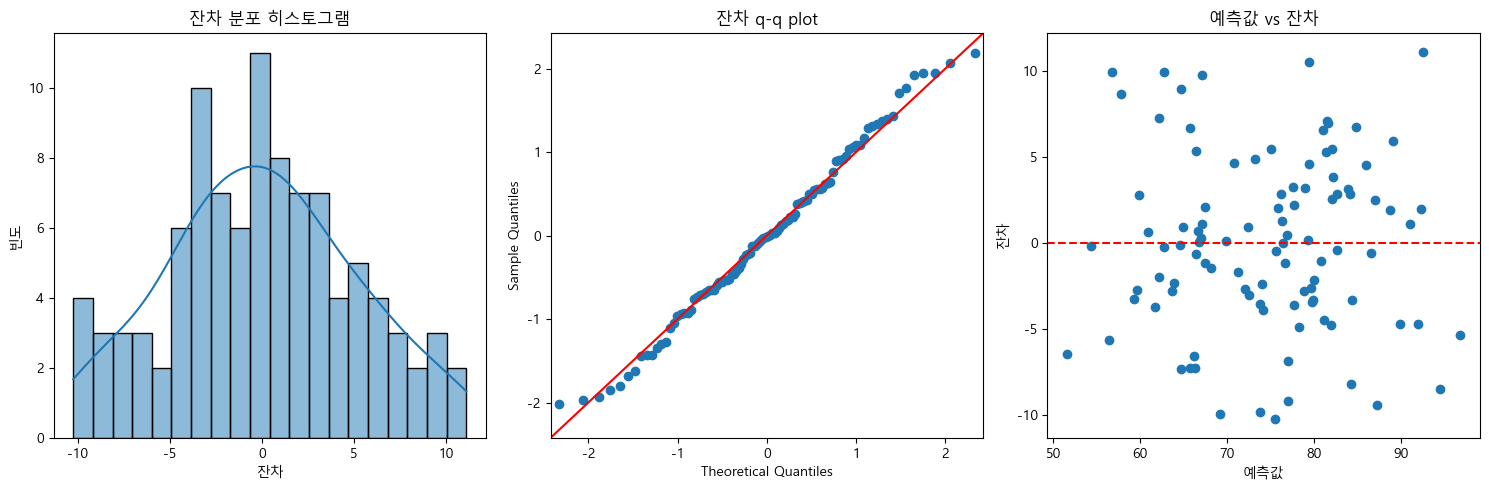

In [19]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus']=False

residuals=q-q_pred

def residual_visual(df):
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    sns.histplot(residuals, bins=20, kde=True)
    plt.title('잔차 분포 히스토그램')
    plt.xlabel('잔차')
    plt.ylabel('빈도')

    plt.subplot(1,3,2)
    sm.qqplot(residuals,fit=True, line='45', ax=plt.gca())
    plt.title('잔차 q-q plot')
    
    plt.subplot(1,3,3)
    plt.scatter(q_pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('예측값 vs 잔차')
    plt.xlabel('예측값')
    plt.ylabel('잔차')

    plt.tight_layout()
    plt.show()
residual_visual(df)